In [1]:
import vega_datasets 
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
from vega_datasets import local_data
local_data.list_datasets()

['airports',
 'anscombe',
 'barley',
 'burtin',
 'cars',
 'crimea',
 'driving',
 'iowa-electricity',
 'iris',
 'la-riots',
 'ohlc',
 'seattle-temps',
 'seattle-weather',
 'sf-temps',
 'stocks',
 'us-employment',
 'wheat']

In [3]:
cr = vega_datasets.data.cars()
cr.head()

,Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration,Year,Origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,1970-01-01,USA
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,1970-01-01,USA
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,1970-01-01,USA
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,1970-01-01,USA
4,ford torino,17.0,8,302.0,140.0,3449,10.5,1970-01-01,USA


In [4]:
cp = vega_datasets.data.driving()
cp.head()

,side,year,miles,gas
0,left,1956,3675,2.38
1,right,1957,3706,2.40
2,bottom,1958,3766,2.26
3,top,1959,3905,2.31
4,right,1960,3935,2.27


In [5]:
cr.Origin.value_counts(normalize=True)

USA       0.625616
Japan     0.194581
Europe    0.179803
Name: Origin, dtype: float64

In [6]:
cr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 9 columns):
Name                406 non-null object
Miles_per_Gallon    398 non-null float64
Cylinders           406 non-null int64
Displacement        406 non-null float64
Horsepower          400 non-null float64
Weight_in_lbs       406 non-null int64
Acceleration        406 non-null float64
Year                406 non-null datetime64[ns]
Origin              406 non-null object
dtypes: datetime64[ns](1), float64(4), int64(2), object(2)
memory usage: 28.7+ KB


In [7]:
cr.tail()

,Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration,Year,Origin
401,ford mustang gl,27.0,4,140.0,86.0,2790,15.6,1982-01-01,USA
402,vw pickup,44.0,4,97.0,52.0,2130,24.6,1982-01-01,Europe
403,dodge rampage,32.0,4,135.0,84.0,2295,11.6,1982-01-01,USA
404,ford ranger,28.0,4,120.0,79.0,2625,18.6,1982-01-01,USA
405,chevy s-10,31.0,4,119.0,82.0,2720,19.4,1982-01-01,USA


In [8]:
cr.loc[cr['Origin']=='Japan']

,Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration,Year,Origin
20,toyota corona mark ii,24.0,4,113.0,95.0,2372,15.0,1970-01-01,Japan
24,datsun pl510,27.0,4,97.0,88.0,2130,14.5,1970-01-01,Japan
35,datsun pl510,27.0,4,97.0,88.0,2130,14.5,1971-01-01,Japan
37,toyota corona,25.0,4,113.0,95.0,2228,14.0,1971-01-01,Japan
60,toyota corolla 1200,31.0,4,71.0,65.0,1773,19.0,1971-01-01,Japan
...,...,...,...,...,...,...,...,...,...
390,toyota corolla,34.0,4,108.0,70.0,2245,16.9,1982-01-01,Japan
391,honda civic,38.0,4,91.0,67.0,1965,15.0,1982-01-01,Japan
392,honda civic (auto),32.0,4,91.0,67.0,1965,15.7,1982-01-01,Japan
393,datsun 310 gx,38.0,4,91.0,67.0,1995,16.2,1982-01-01,Japan


In [9]:
cr.describe()

,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration
count,398.000000,406.000000,406.000000,400.000000,406.000000,406.000000
mean,23.514573,5.475369,194.779557,105.082500,2979.413793,15.519704
std,7.815984,1.712160,104.922458,38.768779,847.004328,2.803359
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000
25%,17.500000,4.000000,105.000000,75.750000,2226.500000,13.700000
50%,23.000000,4.000000,151.000000,95.000000,2822.500000,15.500000
75%,29.000000,8.000000,302.000000,130.000000,3618.250000,17.175000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000


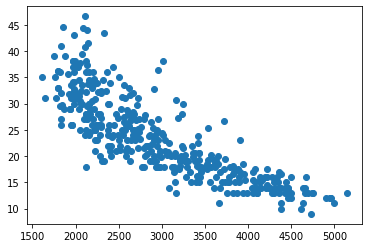

In [10]:
plt.scatter(cr['Weight_in_lbs'],cr['Miles_per_Gallon'])

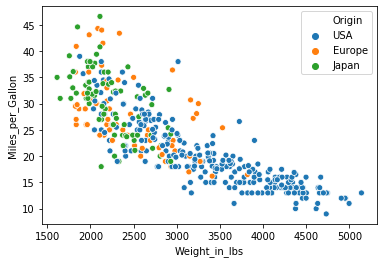

In [11]:
sns.scatterplot('Weight_in_lbs','Miles_per_Gallon',data=cr,hue='Origin')

In [12]:
set(cr['Weight_in_lbs'].isna())

{False}

In [13]:
set(cr['Miles_per_Gallon'].isna())

{False, True}

In [14]:
set(cr['Horsepower'].isna())

{False, True}

In [15]:
x = cr['Weight_in_lbs']
y = cr['Miles_per_Gallon']
y = y.fillna(y.mean())
x = np.array(x)
y = np.array(y)
print(x)
x = x.reshape(len(x),1)
y = y.reshape(len(y),1)
y

[3504 3693 3436 3433 3449 4341 4354 4312 4425 3850 3090 4142 4034 4166
 3850 3563 3609 3353 3761 3086 2372 2833 2774 2587 2130 1835 2672 2430
 2375 2234 2648 4615 4376 4382 4732 2130 2264 2228 2046 1978 2634 3439
 3329 3302 3288 4209 4464 4154 4096 4955 4746 5140 2962 2408 3282 3139
 2220 2123 2074 2065 1773 1613 1834 1955 2278 2126 2254 2408 2226 4274
 4385 4135 4129 3672 4633 4502 4456 4422 2330 3892 4098 4294 4077 2933
 2511 2979 2189 2395 2288 2506 2164 2100 4100 3672 3988 4042 3777 4952
 4464 4363 4237 4735 4951 3821 3121 3278 2945 3021 2904 1950 4997 4906
 4654 4499 2789 2279 2401 2379 2124 2310 2472 2265 4082 4278 1867 2158
 2582 2868 3399 2660 2807 3664 3102 2875 2901 3336 1950 2451 1836 2542
 3781 3632 3613 4141 4699 4457 4638 4257 2219 1963 2300 1649 2003 2125
 2108 2246 2489 2391 2000 3264 3459 3432 3158 4668 4440 4498 4657 3907
 3897 3730 3785 3039 3221 3169 2171 2639 2914 2592 2702 2223 2545 2984
 1937 3211 2694 2957 2945 2671 1795 2464 2220 2572 2255 2202 4215 4190
 3962 

array([[18.        ],
       [15.        ],
       [18.        ],
       [16.        ],
       [17.        ],
       [15.        ],
       [14.        ],
       [14.        ],
       [14.        ],
       [15.        ],
       [23.51457286],
       [23.51457286],
       [23.51457286],
       [23.51457286],
       [23.51457286],
       [15.        ],
       [14.        ],
       [23.51457286],
       [15.        ],
       [14.        ],
       [24.        ],
       [22.        ],
       [18.        ],
       [21.        ],
       [27.        ],
       [26.        ],
       [25.        ],
       [24.        ],
       [25.        ],
       [26.        ],
       [21.        ],
       [10.        ],
       [10.        ],
       [11.        ],
       [ 9.        ],
       [27.        ],
       [28.        ],
       [25.        ],
       [25.        ],
       [23.51457286],
       [19.        ],
       [16.        ],
       [17.        ],
       [19.        ],
       [18.        ],
       [14

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y)

In [17]:
len(X_train)

304

In [18]:
len(X_test)

102

In [19]:
linear_reg = linear_model.LinearRegression()
linear_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

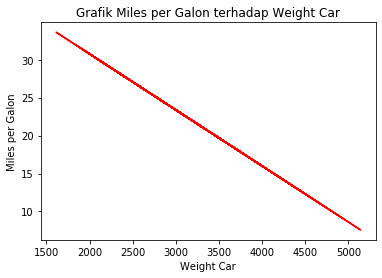

In [20]:
y_test_pred = linear_reg.predict(X_test)
#sns.scatterplot('Weight_in_lbs','Miles_per_Gallon',data=cr,hue='Origin')
#plt.scatter(X_train,y_train,color='green')
plt.plot(X_test,y_test_pred,color='red')
plt.ylabel('Miles per Galon')
plt.xlabel('Weight Car')
plt.title('Grafik Miles per Galon terhadap Weight Car')
plt.show()

In [21]:
from sklearn import metrics
print('MAE',metrics.mean_absolute_error(y_test,y_test_pred))
print('MSE',metrics.mean_squared_error(y_test,y_test_pred))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test,y_test_pred)))
metrics.explained_variance_score(y_test,y_test_pred)

MAE 3.571164147259407
MSE 20.7626880059201
RMSE 4.556609266320748


0.6650320761051727